## Importing Data

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df=pd.read_csv('googleplaystore.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
type(df.values)

numpy.ndarray

In [5]:
data = df.values
print(data[0])

['Photo Editor & Candy Camera & Grid & ScrapBook' 'ART_AND_DESIGN' 4.1
 '159' '19M' '10,000+' 'Free' '0' 'Everyone' 'Art & Design'
 'January 7, 2018' '1.0.0' '4.0.3 and up']


In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt

## Data Cleaning

### Ranking

In [7]:
index_remove = []
for idx, val in enumerate(df['Rating']):
    if val < 0 or val > 5:
        df['Rating'][idx] = 5
    if val < 3:
        df['Rating'][idx] = 2
    elif val < 4:
        df['Rating'][idx] = 3
    elif val < 4.5:
        df['Rating'][idx] = 4
    elif val <= 5:
        df['Rating'][idx] = 5
    else:
        index_remove.append(idx)

/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [8]:
df = df.drop(index_remove)

<IPython.core.display.Javascript object>


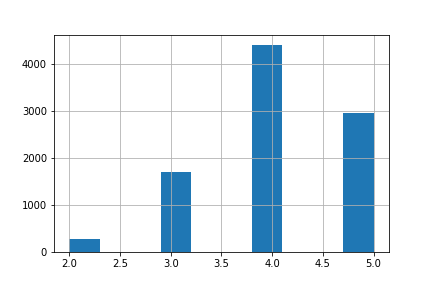

In [9]:
df['Rating'].hist()

In [10]:
features = ['Category', 'Content Rating', 'Type', 'Android Ver']
for f in features:
    set_ = set(df[f])
    print(f , list(set_))

Category ['BOOKS_AND_REFERENCE', 'TOOLS', 'AUTO_AND_VEHICLES', 'PHOTOGRAPHY', 'FINANCE', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION', 'FAMILY', 'EDUCATION', 'ENTERTAINMENT', 'DATING', 'BUSINESS', 'SOCIAL', 'PARENTING', 'HEALTH_AND_FITNESS', 'SPORTS', 'HOUSE_AND_HOME', 'WEATHER', 'GAME', 'LIFESTYLE', 'SHOPPING', 'BEAUTY', 'COMICS', 'COMMUNICATION', 'ART_AND_DESIGN', 'NEWS_AND_MAGAZINES', 'EVENTS', 'MEDICAL', 'FOOD_AND_DRINK', 'PRODUCTIVITY', 'PERSONALIZATION', 'LIBRARIES_AND_DEMO']
Content Rating ['Mature 17+', 'Adults only 18+', 'Unrated', 'Everyone 10+', 'Everyone', 'Teen']
Type ['Paid', 'Free']
Android Ver [nan, '3.0 and up', '4.0.3 - 7.1.1', '7.0 - 7.1.1', '8.0 and up', '7.0 and up', '4.0.3 and up', '6.0 and up', '5.0 - 6.0', '4.0 and up', '2.0.1 and up', '4.1 - 7.1.1', '4.2 and up', '2.1 and up', '5.0 - 8.0', '5.0 and up', 'Varies with device', '4.1 and up', '3.2 and up', '3.1 and up', '2.3 and up', '2.0 and up', '4.4W and up', '4.3 and up', '1.0 and up', '4.4 and up

### Sizes

In [11]:
def preprocess_size(sizes):
    sizes = sizes.apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)
    sizes = sizes.apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
    sizes = sizes.apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
    sizes = sizes.apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
    sizes = sizes.apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
    sizes = sizes.apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
    sizes = sizes.apply(lambda x: float(x))
    return sizes

In [12]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9366, dtype: object

In [13]:
df['Size'] = preprocess_size(df['Size'])

In [14]:
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10834     2.6
10836    53.0
10837     3.6
10839     0.0
10840    19.0
Name: Size, Length: 9366, dtype: float64

### Installs

In [15]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9366, dtype: object

In [16]:
def preprocess_install(installs):
    installs = installs.apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
    installs = installs.apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
    installs = installs.apply(lambda x: int(x))
    return installs

In [17]:
df['Installs']  = preprocess_install(df['Installs'])

### Types

In [18]:
def preprocess_type(types):
    types = types.apply(lambda x: x.replace('Free', '0') if 'Free' in str(x) else '1')
    return types.apply(lambda x: int(x))

In [19]:
df['Type'] = preprocess_type(df['Type'])

In [20]:
df['Type'].value_counts()

0    8719
1     647
Name: Type, dtype: int64

### Content Rating

In [21]:
df['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [22]:
def preprocess_content_rating(crs):
    crs = crs.apply(lambda x: x.replace('Unrated', 'Everyone') if 'Unrated' in str(x) else x)
    crs = crs.apply(lambda x: x.replace('Adults only 18+', 'Mature') if 'Adults only 18+' in str(x) else x)
    crs = crs.apply(lambda x: x.replace('Everyone 10+', 'Mature') if 'Everyone 10+' in str(x) else x)
    crs = crs.apply(lambda x: x.replace('Mature 17+', 'Mature') if 'Mature 17+' in str(x) else x)
    return crs

In [23]:
df['Content Rating'] = preprocess_content_rating(df['Content Rating'])

In [24]:
df['Content Rating'].value_counts()

Everyone    7421
Teen        1084
Mature       861
Name: Content Rating, dtype: int64

In [25]:
df.describe()

,Rating,Size,Installs,Type
count,9366.000000,9366.000000,9.366000e+03,9366.000000
mean,4.071535,18.945051,1.789744e+07,0.069080
std,0.784668,23.013721,9.123822e+07,0.253603
min,2.000000,0.000000,1.000000e+00,0.000000
25%,4.000000,2.400000,1.000000e+04,0.000000
50%,4.000000,9.500000,5.000000e+05,0.000000
75%,5.000000,27.000000,5.000000e+06,0.000000
max,5.000000,100.000000,1.000000e+09,1.000000


In [26]:
del df['App']
del df['Price']
del df['Genres']
del df['Android Ver']
del df['Current Ver']

In [27]:
df

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Last Updated
0,ART_AND_DESIGN,4.0,159,19.0,10000,0,Everyone,"January 7, 2018"
1,ART_AND_DESIGN,3.0,967,14.0,500000,0,Everyone,"January 15, 2018"
2,ART_AND_DESIGN,5.0,87510,8.7,5000000,0,Everyone,"August 1, 2018"
3,ART_AND_DESIGN,5.0,215644,25.0,50000000,0,Teen,"June 8, 2018"
4,ART_AND_DESIGN,4.0,967,2.8,100000,0,Everyone,"June 20, 2018"
...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2.6,500,0,Everyone,"June 18, 2017"
10836,FAMILY,5.0,38,53.0,5000,0,Everyone,"July 25, 2017"
10837,FAMILY,5.0,4,3.6,100,0,Everyone,"July 6, 2018"
10839,BOOKS_AND_REFERENCE,5.0,114,0.0,1000,0,Mature,"January 19, 2015"


In [28]:
import datetime

### Last Updated

In [29]:
def preprocess_last_updated(dates):
    days = [] 
    time1 = datetime.datetime.today()
    for date in dates:
        last_updated = datetime.datetime.strptime(date, "%B %d, %Y")
        days.append((time1 - last_updated).days)
    return days

In [30]:
df['Last Updated'] = preprocess_last_updated(df['Last Updated'])

In [31]:
df.dtypes

Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type                int64
Content Rating     object
Last Updated        int64
dtype: object

In [32]:
df

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Last Updated
0,ART_AND_DESIGN,4.0,159,19.0,10000,0,Everyone,699
1,ART_AND_DESIGN,3.0,967,14.0,500000,0,Everyone,691
2,ART_AND_DESIGN,5.0,87510,8.7,5000000,0,Everyone,493
3,ART_AND_DESIGN,5.0,215644,25.0,50000000,0,Teen,547
4,ART_AND_DESIGN,4.0,967,2.8,100000,0,Everyone,535
...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2.6,500,0,Everyone,902
10836,FAMILY,5.0,38,53.0,5000,0,Everyone,865
10837,FAMILY,5.0,4,3.6,100,0,Everyone,519
10839,BOOKS_AND_REFERENCE,5.0,114,0.0,1000,0,Mature,1783


## Datatype Transformation

In [33]:
one_hot_encoded = pd.get_dummies(df['Content Rating'],prefix='content_rating')

In [34]:
one_hot_encoded

,content_rating_Everyone,content_rating_Mature,content_rating_Teen
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
10834,1,0,0
10836,1,0,0
10837,1,0,0
10839,0,1,0


In [35]:
new_df = df
new_df['content_rating_Everyone'] = one_hot_encoded['content_rating_Everyone']
new_df['content_rating_Mature'] = one_hot_encoded['content_rating_Mature']
new_df['content_rating_Teen'] = one_hot_encoded['content_rating_Teen']

In [36]:
del new_df['Content Rating']

In [37]:
new_df

,Category,Rating,Reviews,Size,Installs,Type,Last Updated,content_rating_Everyone,content_rating_Mature,content_rating_Teen
0,ART_AND_DESIGN,4.0,159,19.0,10000,0,699,1,0,0
1,ART_AND_DESIGN,3.0,967,14.0,500000,0,691,1,0,0
2,ART_AND_DESIGN,5.0,87510,8.7,5000000,0,493,1,0,0
3,ART_AND_DESIGN,5.0,215644,25.0,50000000,0,547,0,0,1
4,ART_AND_DESIGN,4.0,967,2.8,100000,0,535,1,0,0
...,...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2.6,500,0,902,1,0,0
10836,FAMILY,5.0,38,53.0,5000,0,865,1,0,0
10837,FAMILY,5.0,4,3.6,100,0,519,1,0,0
10839,BOOKS_AND_REFERENCE,5.0,114,0.0,1000,0,1783,0,1,0


In [38]:
labels = new_df['Category'].astype('category').cat.categories.tolist()
mapping_labels = { label: val for label, val in zip(labels,list(range(1,len(labels)+1)))}

In [39]:
def preprocess_category(categories):
    return categories.apply(lambda x: mapping_labels[x])

In [40]:
new_df['Category'] = preprocess_category(new_df['Category'])

In [41]:
new_df['Category'].value_counts()

12    1747
15    1097
30     734
26     351
21     350
7      328
13     323
29     319
25     317
19     314
24     314
5      303
16     297
28     259
27     238
22     233
31     226
8      195
4      178
32     160
9      155
10     149
20     124
14     109
17      76
33      75
2       73
18      65
1       62
6       58
23      50
11      45
3       42
Name: Category, dtype: int64

In [42]:
new_df

,Category,Rating,Reviews,Size,Installs,Type,Last Updated,content_rating_Everyone,content_rating_Mature,content_rating_Teen
0,1,4.0,159,19.0,10000,0,699,1,0,0
1,1,3.0,967,14.0,500000,0,691,1,0,0
2,1,5.0,87510,8.7,5000000,0,493,1,0,0
3,1,5.0,215644,25.0,50000000,0,547,0,0,1
4,1,4.0,967,2.8,100000,0,535,1,0,0
...,...,...,...,...,...,...,...,...,...,...
10834,12,4.0,7,2.6,500,0,902,1,0,0
10836,12,5.0,38,53.0,5000,0,865,1,0,0
10837,12,5.0,4,3.6,100,0,519,1,0,0
10839,4,5.0,114,0.0,1000,0,1783,0,1,0


In [43]:
new_df['Reviews']  = new_df['Reviews'].apply(lambda x: float(x))

In [44]:
new_df

,Category,Rating,Reviews,Size,Installs,Type,Last Updated,content_rating_Everyone,content_rating_Mature,content_rating_Teen
0,1,4.0,159.0,19.0,10000,0,699,1,0,0
1,1,3.0,967.0,14.0,500000,0,691,1,0,0
2,1,5.0,87510.0,8.7,5000000,0,493,1,0,0
3,1,5.0,215644.0,25.0,50000000,0,547,0,0,1
4,1,4.0,967.0,2.8,100000,0,535,1,0,0
...,...,...,...,...,...,...,...,...,...,...
10834,12,4.0,7.0,2.6,500,0,902,1,0,0
10836,12,5.0,38.0,53.0,5000,0,865,1,0,0
10837,12,5.0,4.0,3.6,100,0,519,1,0,0
10839,4,5.0,114.0,0.0,1000,0,1783,0,1,0


## Normalizaing

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(new_df) 
new_df.loc[:,:] = scaled_values

In [46]:
new_df['Type'].value_counts()

0.0    8719
1.0     647
Name: Type, dtype: int64

In [47]:
y_labels = new_df['Type']

In [48]:
del new_df['Type']

In [49]:
new_df

,Category,Rating,Reviews,Size,Installs,Last Updated,content_rating_Everyone,content_rating_Mature,content_rating_Teen
0,0.00000,0.666667,2.021538e-06,0.190,9.999000e-06,0.070976,1.0,0.0,0.0
1,0.00000,0.333333,1.235953e-05,0.140,4.999990e-04,0.068311,1.0,0.0,0.0
2,0.00000,1.000000,1.119638e-03,0.087,4.999999e-03,0.002333,1.0,0.0,0.0
3,0.00000,1.000000,2.759054e-03,0.250,5.000000e-02,0.020327,0.0,0.0,1.0
4,0.00000,0.666667,1.235953e-05,0.028,9.999900e-05,0.016328,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10834,0.34375,0.666667,7.676727e-08,0.026,4.990000e-07,0.138620,1.0,0.0,0.0
10836,0.34375,1.000000,4.733982e-07,0.530,4.999000e-06,0.126291,1.0,0.0,0.0
10837,0.34375,1.000000,3.838364e-08,0.036,9.900000e-08,0.010996,1.0,0.0,0.0
10839,0.09375,1.000000,1.445784e-06,0.000,9.990000e-07,0.432189,0.0,1.0,0.0


## Training and Testing Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
new_df, x_test, y_labels, y_test = train_test_split(new_df, y_labels, test_size=0.25, random_state=0, stratify=y_labels)

In [52]:
y_test.value_counts()

0.0    2180
1.0     162
Name: Type, dtype: int64

# Models and Training

In [53]:
from sklearn import tree
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve

In [54]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

def decision_tree(x_train, y_train, x_test, y_test):
    tree_classifier = tree.DecisionTreeClassifier()
    y_pred = cross_val_predict(tree_classifier, x_train, y_train, cv=10)
    print('Training: ')
    print('Accuracy: ', accuracy_score(y_train, y_pred))
    print('Confusion Matrix: ', confusion_matrix(y_train, y_pred))
    print('F1 Score: ',f1_score(y_train, y_pred))
    print('Precision: ',precision_score(y_train, y_pred))
    print('Recall: ',recall_score(y_train, y_pred))
    print(cross_val_score(tree_classifier, x_train, y_train, scoring='accuracy', cv=10))
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    print(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plot_roc_curve(fpr, tpr)
    plt.show()
    
    y_pred = cross_val_predict(tree_classifier, x_test, y_test, cv=10)
    print('Testing: ')
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
    print('F1 Score: ',f1_score(y_test, y_pred))
    print('Precision: ',precision_score(y_test, y_pred))
    print('Recall: ',recall_score(y_test, y_pred))
    print(cross_val_score(tree_classifier, x_test, y_test, scoring='accuracy', cv=10))
    return 

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
def naive_based(x_train, y_train, x_test, y_test):
    naive_based = GaussianNB()
    naive_based.fit(x_train, y_train)
    y_pred = cross_val_predict(naive_based, x_train, y_train, cv=10)
    print('Training: ')
    print('Accuracy: ', accuracy_score(y_train, y_pred))
    print('Confusion Matrix: ', confusion_matrix(y_train, y_pred))
    print('F1 Score: ',f1_score(y_train, y_pred))
    print('Precision: ',precision_score(y_train, y_pred))
    print('Recall: ',recall_score(y_train, y_pred))
    print(cross_val_score(naive_based, x_train, y_train, scoring='accuracy', cv=10))
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    print(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plot_roc_curve(fpr, tpr)
    plt.show()
    
    
    y_pred = cross_val_predict(naive_based, x_test, y_test, cv=10)
    print('Testing: ')
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
    print('F1 Score: ',f1_score(y_test, y_pred))
    print('Precision: ',precision_score(y_test, y_pred))
    print('Recall: ',recall_score(y_test, y_pred))
    print(cross_val_score(naive_based, x_test, y_test, scoring='accuracy', cv=10))
    return 

In [57]:
from sklearn.neighbors import KNeighborsClassifier


In [58]:
def knn(x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier(n_neighbors = 5)
    y_pred = cross_val_predict(knn, x_train, y_train, cv=10)
    print('Training: ')
    print('Accuracy: ', accuracy_score(y_train, y_pred))
    print('Confusion Matri: ', confusion_matrix(y_train, y_pred))
    print('F1 Score: ',f1_score(y_train, y_pred))
    print('Precision: ',precision_score(y_train, y_pred))
    print('Recall: ',recall_score(y_train, y_pred))
    print(cross_val_score(knn, x_train, y_train, scoring='accuracy', cv=10))
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    print(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plot_roc_curve(fpr, tpr)
    plt.show()
    
    
    y_pred = cross_val_predict(knn, x_test, y_test, cv=10)
    print('Testing: ')
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
    print('F1 Score: ',f1_score(y_test, y_pred))
    print('Precision: ',precision_score(y_test, y_pred))
    print('Recall: ',recall_score(y_test, y_pred))
    print(cross_val_score(knn, x_test, y_test, scoring='accuracy', cv=10))
    return 

In [59]:
import numpy as np
from sklearn.linear_model import SGDClassifier

In [60]:
def linear_classifier(x_train, y_train, x_test, y_test):
    model  = SGDClassifier(max_iter=1, learning_rate='optimal')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    print('Training: ')
    print('Accuracy: ', accuracy_score(y_train, y_pred))
    print('Confusion Matri: ', confusion_matrix(y_train, y_pred))
    print('F1 Score: ',f1_score(y_train, y_pred))
    print('Precision: ',precision_score(y_train, y_pred))
    print('Recall: ',recall_score(y_train, y_pred))
    print(cross_val_score(model, x_train, y_train, scoring='accuracy', cv=10))
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    print(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plot_roc_curve(fpr, tpr)
    plt.show()
    
    y_pred = cross_val_predict(model, x_test, y_test, cv=10)
    print('Testing: ')
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
    print('F1 Score: ',f1_score(y_test, y_pred))
    print('Precision: ',precision_score(y_test, y_pred))
    print('Recall: ',recall_score(y_test, y_pred))
    print(cross_val_score(model, x_test, y_test, scoring='accuracy', cv=10))
    return

Decision Trees
Training: 
Accuracy:  0.918992027334852
Confusion Matrix:  [[6249  290]
 [ 279  206]]
F1 Score:  0.4199796126401631
Precision:  0.4153225806451613
Recall:  0.4247422680412371
[0.90896159 0.92745377 0.91607397 0.92603129 0.92460882 0.91880342
 0.91452991 0.93162393 0.92450142 0.91440799]
[0.         0.04434929 1.        ] [0.         0.42474227 1.        ]


<IPython.core.display.Javascript object>


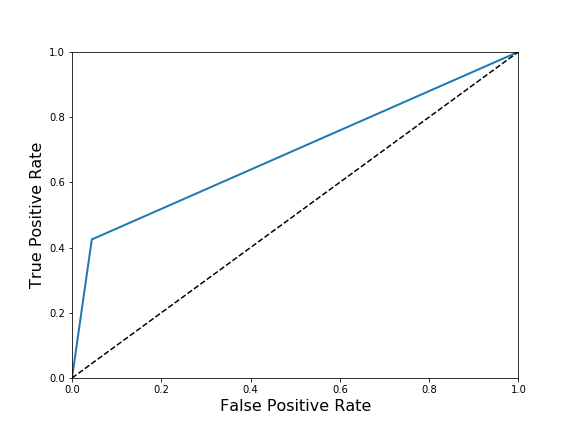

Testing: 
Accuracy:  0.9094790777113578
Confusion Matrix:  [[2068  112]
 [ 100   62]]
F1 Score:  0.369047619047619
Precision:  0.3563218390804598
Recall:  0.38271604938271603
[0.9106383  0.93617021 0.92307692 0.91025641 0.9017094  0.89316239
 0.91880342 0.8974359  0.91025641 0.90598291]

Naive Bayes
Training: 
Accuracy:  0.3745728929384966
Confusion Matrix:  [[2148 4391]
 [   2  483]]
F1 Score:  0.18025751072961374
Precision:  0.09909725071809602
Recall:  0.9958762886597938
[0.36273115 0.35135135 0.3485064  0.38549075 0.40113798 0.38034188
 0.38746439 0.37606838 0.36894587 0.38373752]
[0.         0.67150941 1.        ] [0.         0.99587629 1.        ]


<IPython.core.display.Javascript object>


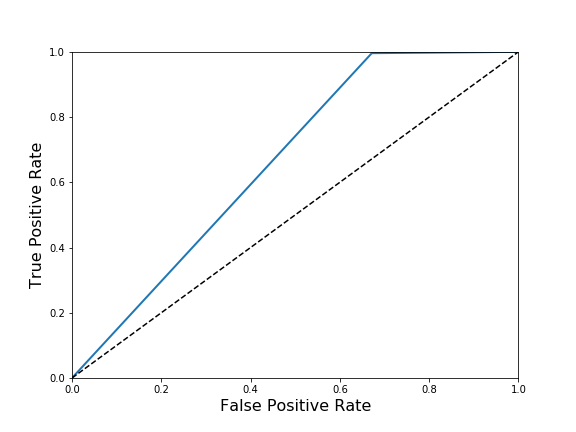

Testing: 
Accuracy:  0.408198121263877
Confusion Matrix:  [[ 801 1379]
 [   7  155]]
F1 Score:  0.18278301886792453
Precision:  0.10104302477183832
Recall:  0.9567901234567902
[0.38723404 0.44255319 0.44017094 0.41025641 0.38034188 0.40598291
 0.41880342 0.37606838 0.41880342 0.4017094 ]

kNN
Training: 
Accuracy:  0.9241173120728929
Confusion Matri:  [[6458   81]
 [ 452   33]]
F1 Score:  0.11018363939899833
Precision:  0.2894736842105263
Recall:  0.06804123711340206
[0.91891892 0.92460882 0.92460882 0.93314367 0.91607397 0.92022792
 0.92735043 0.92022792 0.92307692 0.93295292]
[0.         0.01238722 1.        ] [0.         0.06804124 1.        ]


<IPython.core.display.Javascript object>


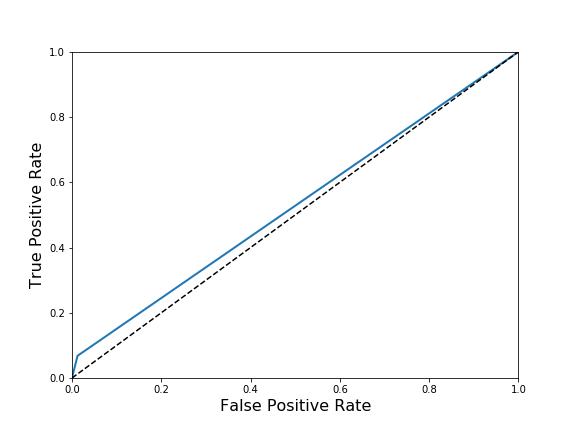

Testing: 
Accuracy:  0.9252775405636209
Confusion Matrix:  [[2165   15]
 [ 160    2]]
F1 Score:  0.0223463687150838
Precision:  0.11764705882352941
Recall:  0.012345679012345678
[0.92340426 0.92765957 0.93162393 0.93162393 0.92735043 0.91880342
 0.93162393 0.92307692 0.91880342 0.91880342]

Linear Classifier
Training: 
Accuracy:  0.9309510250569476
Confusion Matri:  [[6539    0]
 [ 485    0]]
F1 Score:  0.0
Precision:  0.0
Recall:  0.0
[0.85206259 0.93029872 0.92460882 0.93029872 0.93029872 0.93162393
 0.93162393 0.92450142 0.93304843 0.93152639]
[0. 1.] [0. 1.]


/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning

<IPython.core.display.Javascript object>


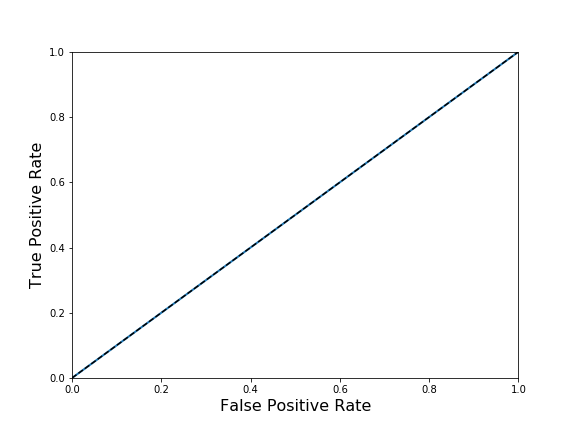

Testing: 
Accuracy:  0.9107600341588385
Confusion Matrix:  [[2127   53]
 [ 156    6]]
F1 Score:  0.054298642533936646
Precision:  0.1016949152542373
Recall:  0.037037037037037035
[0.92765957 0.92340426 0.91025641 0.88461538 0.93162393 0.93162393
 0.93162393 0.93162393 0.93162393 0.93162393]


/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit

In [63]:
print('Decision Trees')
decision_tree(new_df, y_labels, x_test, y_test)
print('\nNaive Bayes')
naive_based(new_df, y_labels, x_test, y_test)
print('\nkNN')
knn(new_df, y_labels, x_test, y_test)
print('\nLinear Classifier')
linear_classifier(new_df, y_labels, x_test, y_test)

In [64]:
from imblearn.combine import SMOTEENN 
sampling = SMOTEENN(random_state=1)
x_combo, y_combo = sampling.fit_sample(new_df, y_labels)


Decision Tree 
Training: 
Accuracy:  0.9518792422246987
Confusion Matrix:  [[4376  265]
 [ 210 5020]]
F1 Score:  0.9548264384213029
Precision:  0.9498580889309366
Recall:  0.9598470363288719
[0.89979757 0.9473151  0.95947315 0.95542047 0.96048632 0.95947315
 0.96149949 0.96757852 0.96859169 0.95035461]
[0.         0.05709976 1.        ] [0.         0.95984704 1.        ]


<IPython.core.display.Javascript object>


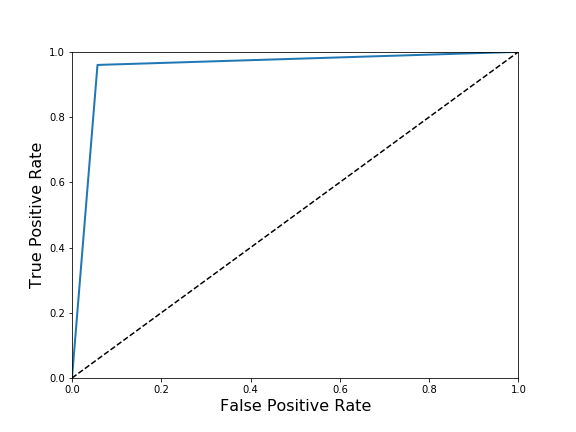

Testing: 
Accuracy:  0.9128949615713066
Confusion Matrix:  [[2072  108]
 [  96   66]]
F1 Score:  0.39285714285714285
Precision:  0.3793103448275862
Recall:  0.4074074074074074
[0.91914894 0.92765957 0.91880342 0.91025641 0.9017094  0.8974359
 0.93589744 0.88461538 0.91452991 0.90598291]


In [67]:
print('\nDecision Tree ')
decision_tree(x_combo, y_combo, x_test, y_test)
# print('\nNaive Based ')
# naive_based(x_combo, y_combo, x_test, y_test)
# print('\n KNN ')
# knn(x_combo, y_combo, x_test, y_test)
# print('\n Linear Classifer')
# linear_classifier(x_combo, y_combo, x_test, y_test)

In [68]:
new_df

,Category,Rating,Reviews,Size,Installs,Last Updated,content_rating_Everyone,content_rating_Mature,content_rating_Teen
8943,0.09375,0.333333,4.004693e-06,0.026,4.999900e-05,0.217594,1.0,0.0,0.0
6491,0.87500,1.000000,1.484167e-06,0.044,9.990000e-07,0.181606,1.0,0.0,0.0
8934,0.03125,0.333333,1.407400e-07,0.190,4.999000e-06,0.023659,1.0,0.0,0.0
9080,0.43750,0.666667,5.041051e-06,0.540,4.999900e-05,0.085638,0.0,0.0,1.0
1579,0.56250,0.666667,4.295257e-04,0.370,9.999990e-04,0.001999,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2677,0.81250,0.333333,4.676406e-05,0.090,9.999990e-04,0.001666,0.0,0.0,1.0
9095,0.37500,1.000000,8.201304e-06,0.032,9.999000e-06,0.034322,1.0,0.0,0.0
8287,0.56250,1.000000,0.000000e+00,0.012,9.000000e-09,0.266911,1.0,0.0,0.0
8813,0.96875,0.333333,9.383520e-05,0.000,9.999990e-04,0.007331,1.0,0.0,0.0


In [69]:
from skrules import SkopeRules


/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [73]:
x_combo = pd.DataFrame(x_combo, columns=new_df.columns)

In [74]:
new_df.rename(columns={'Last Updated': 'last_updated'}, inplace=True)
x_combo.rename(columns={'Last Updated': 'last_updated'}, inplace=True)
x_test.rename(columns={'Last Updated': 'last_updated'}, inplace=True)


In [75]:
from skrules import SkopeRules

In [76]:
feature_names = list(new_df.columns)

clf = SkopeRules(max_depth_duplication=10,
                 n_estimators=20,
                 precision_min=0.3,
                 recall_min=0.1,
                 feature_names=feature_names)

In [77]:
clf.fit(x_combo, y_combo)

SkopeRules(bootstrap=False, bootstrap_features=False,
           feature_names=['Category', 'Rating', 'Reviews', 'Size', 'Installs',
                          'last_updated', 'content_rating_Everyone',
                          'content_rating_Mature', 'content_rating_Teen'],
           max_depth=3, max_depth_duplication=10, max_features=1.0,
           max_samples=0.8, max_samples_features=1.0, min_samples_split=2,
           n_estimators=20, n_jobs=1, precision_min=0.3, random_state=None,
           recall_min=0.1, verbose=0)

In [78]:
skope_rules_scoring = clf.score_top_rules(x_combo)

In [79]:
clf.rules_

[('Category > 0.12561342865228653 and Installs <= 9.994329957407899e-05',
  (0.8071105046374383, 0.8499823678894078, 2)),
 ('Installs <= 9.978136586141773e-05 and Reviews <= 1.3575322100223275e-05',
  (0.7202486678507993, 0.5794236723029292, 1)),
 ('Installs <= 9.994329957407899e-05 and Reviews > 1.0791561635414837e-05',
  (0.9579768438036155, 0.3190911990384286, 2))]

In [81]:
## Credits: https://github.com/scikit-learn-contrib/skope-rules/blob/master/notebooks/demo_titanic.ipynb
def compute_y_pred_from_query(X, rule):
    score = np.zeros(X.shape[0])
    X = X.reset_index(drop=True)
    score[list(X.query(rule).index)] = 1
    return(score)

def compute_performances_from_y_pred(y_true, y_pred, index_name='default_index'):
    df = pd.DataFrame(data=
        {
            'precision':[sum(y_true * y_pred)/sum(y_pred)],
            'recall':[sum(y_true * y_pred)/sum(y_true)]
        },
        index=[index_name],
        columns=['precision', 'recall']
    )
    return(df)

def compute_train_test_query_performances(X_train, y_train, rule):
    
    y_train_pred = compute_y_pred_from_query(X_train, rule)
    y_test_pred = compute_y_pred_from_query(x_test, rule)
    performances = None
    performances = pd.concat([
        performances,
                compute_performances_from_y_pred(y_train, y_train_pred, 'train_set')],
        axis=0)
    performances = pd.concat([
        performances,
        compute_performances_from_y_pred(y_test, y_test_pred, 'test_set')],
        axis=0)
    return(performances)

for i in range(len(clf.rules_)):
    print('Rule '+str(i+1)+':')
    display(compute_train_test_query_performances(x_combo, y_combo, clf.rules_[i][0])
)

Rule 1:


,precision,recall
train_set,0.807637,0.853346
test_set,0.159847,0.771605


Rule 2:


,precision,recall
train_set,0.717044,0.575143
test_set,0.133917,0.660494


Rule 3:


,precision,recall
train_set,0.957398,0.317973
test_set,0.433333,0.160494


In [82]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [83]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model = model.fit(new_df, y_labels)

Accuracy:  0.9935933940774487
Confusion Matri:  [[6538    1]
 [  44  441]]
F1 Score:  0.9514563106796117
Precision:  0.997737556561086
Recall:  0.9092783505154639
[0.00000000e+00 1.52928582e-04 1.00000000e+00] [0.         0.90927835 1.        ]


<IPython.core.display.Javascript object>


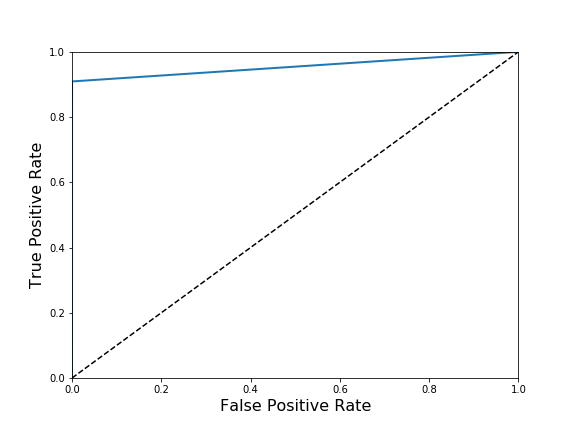

In [85]:
y_pred = model.predict(new_df)
print('Accuracy: ', accuracy_score(y_labels, y_pred))
print('Confusion Matri: ', confusion_matrix(y_labels, y_pred))
print('F1 Score: ',f1_score(y_labels, y_pred))
print('Precision: ',precision_score(y_labels, y_pred))
print('Recall: ',recall_score(y_labels, y_pred))
fpr, tpr, thresholds = roc_curve(y_labels, y_pred)
print(fpr, tpr)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model = model.fit(x_combo, y_combo)

Training: 
Accuracy:  0.7818863337047918
Confusion Matri:  [[4641    0]
 [2153 3077]]
F1 Score:  0.7408209943421211
Precision:  1.0
Recall:  0.5883365200764819
[0. 0. 1.] [0.         0.58833652 1.        ]


<IPython.core.display.Javascript object>


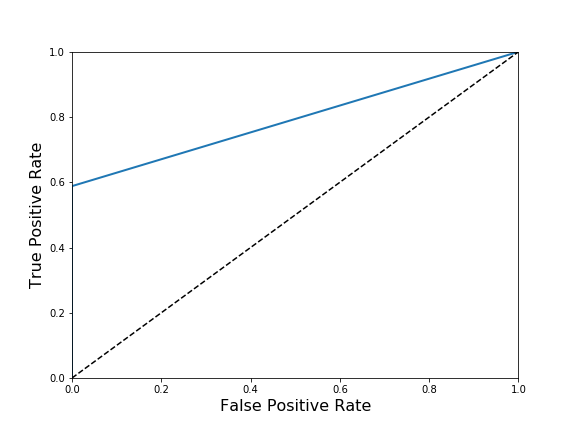


Testing: 
Accuracy:  0.9397950469684031
Confusion Matri:  [[2139   41]
 [ 100   62]]
F1 Score:  0.4679245283018868
Precision:  0.6019417475728155
Recall:  0.38271604938271603


In [86]:
print('Training: ')
y_pred = model.predict(x_combo)
print('Accuracy: ', accuracy_score(y_combo, y_pred))
print('Confusion Matri: ', confusion_matrix(y_combo, y_pred))
print('F1 Score: ',f1_score(y_combo, y_pred))
print('Precision: ',precision_score(y_combo, y_pred))
print('Recall: ',recall_score(y_combo, y_pred))
fpr, tpr, thresholds = roc_curve(y_combo, y_pred)
print(fpr, tpr)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

print('\nTesting: ')
y_pred = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matri: ', confusion_matrix(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))

In [87]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=20)
random_forest.fit(x_combo, y_combo)
print(random_forest.feature_importances_)

[0.11153203 0.04174466 0.16392439 0.07978117 0.44304326 0.13736965
 0.01013974 0.0058366  0.0066285 ]


In [88]:
x_combo
del x_combo['content_rating_Everyone']
del x_combo['content_rating_Mature']
del x_combo['content_rating_Teen']
del x_combo['Rating']

In [89]:
del x_test['content_rating_Everyone']
del x_test['content_rating_Mature']
del x_test['content_rating_Teen']
del x_test['Rating']

In [90]:
x_combo, x_test

(      Category       Reviews      Size      Installs  last_updated
 0     0.031250  1.407400e-07  0.190000  4.999000e-06      0.023659
 1     0.437500  5.041051e-06  0.540000  4.999900e-05      0.085638
 2     0.093750  6.525218e-07  0.036000  4.999000e-06      0.122626
 3     0.343750  7.768848e-05  0.085000  9.999900e-05      0.054648
 4     0.218750  1.839856e-05  0.380000  4.999900e-05      0.002999
 ...        ...           ...       ...           ...           ...
 9866  0.343750  1.059960e-04  0.140000  1.249756e-04      0.029275
 9867  0.718750  2.189237e-07  0.417223  6.399869e-08      0.027343
 9868  0.766746  1.345316e-04  0.100546  7.696089e-05      0.478120
 9869  0.414322  1.911653e-06  0.456095  4.479823e-06      0.153081
 9870  0.343750  3.320546e-05  0.627101  7.616628e-05      0.301059
 
 [9871 rows x 5 columns],
        Category       Reviews     Size  Installs  last_updated
 5922    0.34375  3.863953e-06  0.42000   0.00001      0.005665
 1787    0.43750  1.301013e-


Decision Tree 
Training: 
Accuracy:  0.9500557187721609
Confusion Matrix:  [[4371  270]
 [ 223 5007]]
F1 Score:  0.9530788997810982
Precision:  0.9488345650938033
Recall:  0.9573613766730401
[0.8937247  0.96352584 0.94934144 0.95440729 0.95339412 0.95744681
 0.94934144 0.95947315 0.96555218 0.94630193]
[0.         0.05817712 1.        ] [0.         0.95736138 1.        ]


<IPython.core.display.Javascript object>


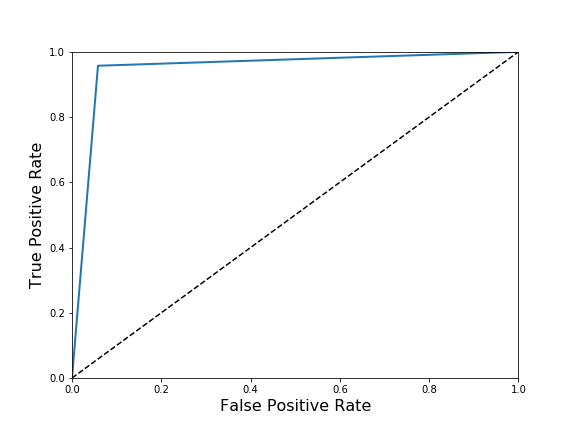

Testing: 
Accuracy:  0.9128949615713066
Confusion Matrix:  [[2073  107]
 [  97   65]]
F1 Score:  0.38922155688622756
Precision:  0.37790697674418605
Recall:  0.4012345679012346
[0.9106383  0.93617021 0.9017094  0.93162393 0.88888889 0.9017094
 0.94444444 0.8974359  0.91880342 0.9017094 ]

Naive Based 
Training: 
Accuracy:  0.7044878938304123
Confusion Matrix:  [[1760 2881]
 [  36 5194]]
F1 Score:  0.7807591131153702
Precision:  0.6432198142414861
Recall:  0.9931166347992352
[0.701417   0.68389058 0.69604863 0.70921986 0.7183384  0.70921986
 0.71225937 0.70516717 0.70314083 0.70618034]
[0.         0.62077139 1.        ] [0.         0.99311663 1.        ]


<IPython.core.display.Javascript object>


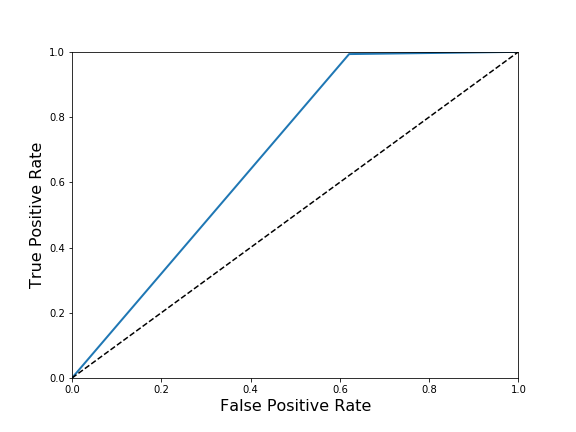

Testing: 
Accuracy:  0.37147736976942786
Confusion Matrix:  [[ 709 1471]
 [   1  161]]
F1 Score:  0.1794871794871795
Precision:  0.09865196078431372
Recall:  0.9938271604938271
[0.35319149 0.41702128 0.39316239 0.35897436 0.32905983 0.34188034
 0.37179487 0.38888889 0.38888889 0.37179487]

 KNN 
Training: 
Accuracy:  0.8936277986019654
Confusion Matri:  [[3842  799]
 [ 251 4979]]
F1 Score:  0.9046148255813953
Precision:  0.8617168570439598
Recall:  0.9520076481835564
[0.89271255 0.86727457 0.90070922 0.89564336 0.89260385 0.89463019
 0.89766971 0.89463019 0.89969605 0.90070922]
[0.         0.17216117 1.        ] [0.         0.95200765 1.        ]


<IPython.core.display.Javascript object>


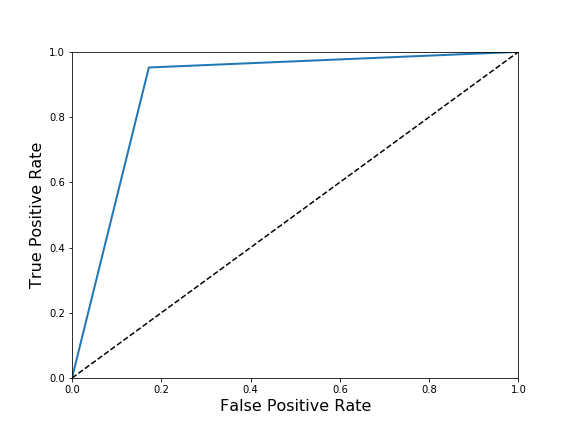

Testing: 
Accuracy:  0.9244235695986337
Confusion Matrix:  [[2162   18]
 [ 159    3]]
F1 Score:  0.03278688524590164
Precision:  0.14285714285714285
Recall:  0.018518518518518517
[0.91914894 0.93191489 0.92307692 0.93162393 0.91880342 0.91880342
 0.92307692 0.92735043 0.92307692 0.92735043]

Linear Classifier
Training: 
Accuracy:  0.6286090568331476
Confusion Matri:  [[4056  585]
 [3081 2149]]
F1 Score:  0.5396785534907081
Precision:  0.7860277980980249
Recall:  0.41089866156787763
[0.54453441 0.59574468 0.64336373 0.65552178 0.65957447 0.5775076
 0.6585613  0.6970618  0.65450861 0.56231003]
[0.         0.12605042 1.        ] [0.         0.41089866 1.        ]


/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit

<IPython.core.display.Javascript object>


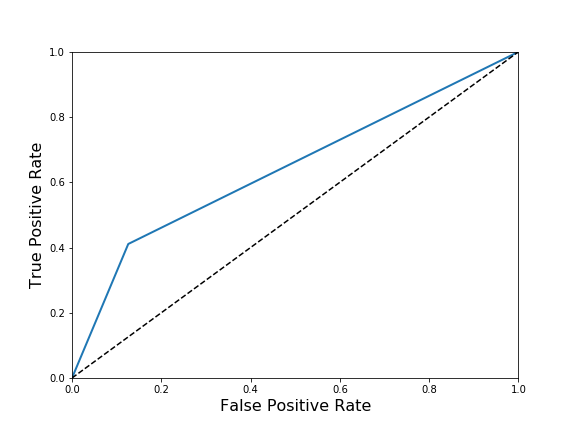

/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Testing: 
Accuracy:  0.9299743808710503
Confusion Matrix:  [[2175    5]
 [ 159    3]]
F1 Score:  0.03529411764705882
Precision:  0.375
Recall:  0.018518518518518517
[0.92340426 0.92765957 0.93162393 0.93162393 0.93162393 0.93162393
 0.93162393 0.73504274 0.93162393 0.91880342]


/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit

In [91]:
print('\nDecision Tree ')
decision_tree(x_combo, y_combo, x_test, y_test)
print('\nNaive Based ')
naive_based(x_combo, y_combo, x_test, y_test)
print('\n KNN ')
knn(x_combo, y_combo, x_test, y_test)
print('\nLinear Classifier')
linear_classifier(x_combo, y_combo, x_test, y_test)

In [92]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model = model.fit(x_combo, y_combo)

Training: 
Accuracy:  0.9979738628305136
Confusion Matri:  [[4634    7]
 [  13 5217]]
F1 Score:  0.9980868567055673
Precision:  0.9986600306278713
Recall:  0.9975143403441683
[0.        0.0015083 1.       ] [0.         0.99751434 1.        ]


<IPython.core.display.Javascript object>


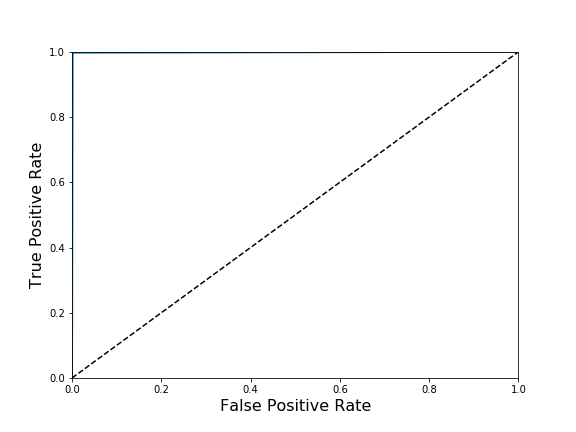


Testing: 
Accuracy:  0.9150298889837746
Confusion Matri:  [[2039  141]
 [  58  104]]
F1 Score:  0.5110565110565111
Precision:  0.42448979591836733
Recall:  0.6419753086419753


In [93]:
print('Training: ')
y_pred = model.predict(x_combo)
print('Accuracy: ', accuracy_score(y_combo, y_pred))
print('Confusion Matri: ', confusion_matrix(y_combo, y_pred))
print('F1 Score: ',f1_score(y_combo, y_pred))
print('Precision: ',precision_score(y_combo, y_pred))
print('Recall: ',recall_score(y_combo, y_pred))
fpr, tpr, thresholds = roc_curve(y_combo, y_pred)
print(fpr, tpr)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

print('\nTesting: ')
y_pred = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matri: ', confusion_matrix(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))